In [1]:
from pyteomics import pepxml
from pyopenms import *
import numpy as np
import pandas as pd
import scipy.stats as st
from xml.etree import ElementTree as ET
import pickle
import sys
import time
import deepdish as dd
import seaborn as sns



def correct_PSMs(pepxmlfile, final_list):


    b = pepxml.read(pepxmlfile)
    correct_dict = {}

    for spectrum in b:
        if 'search_hit' in spectrum.keys():
            spec = str(spectrum['spectrum'])
            pep = str(spectrum['search_hit'][0]['peptide'])

            if len(pep) >= 7:
                new_seq = pep.replace('I', 'X')
                new_seq = new_seq.replace('L', 'X')

                if new_seq in final_list:
                    correct_dict[spec] = new_seq

    return correct_dict





def getMzML(mzml_file, GT):

    shift = 19.5

    GT = pickle.load(open(GT, 'rb'))
    core = mzml_file.split('.')[0]
    mzml_dict = MSExperiment()
    if mzml_file.split('.')[-1]  == 'mzML':
        MzMLFile().load(mzml_file, mzml_dict)
    if mzml_file.split('.')[-1]  == 'mzXML':
        MzXMLFile().load(mzml_file, mzml_dict)

    new_mzml = MSExperiment()

    for i in range(len(mzml_dict.getSpectra())):
        if (i % 1000 == 0): print(f'{i}...', end='', flush=True)

        spec = mzml_dict[i]
        mslevel = spec.getMSLevel()

        if mslevel == 2:

            id = int(str(spec.getNativeID()).split('=')[-1][:-1])
            spectrum = MSSpectrum()
            peaks = spec.get_peaks()
            mz = peaks[0]
            i = peaks[1]
            spectrum.set_peaks([mz, i])

            spectrum.setDriftTime(spec.getDriftTime()) # 25 ms
            spectrum.setRT(spec.getRT()) # 205.2 s
            spectrum.setMSLevel(spec.getMSLevel()) # MS3
            spectrum.setNativeID(spec.getNativeID())

            prec = spec.getPrecursors()[0]
            p = Precursor()
            p.setIsolationWindowLowerOffset(prec.getIsolationWindowLowerOffset())
            p.setIsolationWindowUpperOffset(prec.getIsolationWindowUpperOffset())
            cur_ch = int(prec.getCharge())
    
            
            if id in GT.keys():
                p.setMZ(float(prec.getMZ())) # isolation at 600 +/- 1.5 Th
                p.setActivationEnergy(35) # 40 eV
                p.setCharge(int(prec.getCharge())) # 4+ ion
                spectrum.setPrecursors([p])
                new_mzml.addSpectrum(spectrum)
            else:
                #originally +19.5
                #now 30.8
                p.setMZ(float(prec.getMZ())+shift) # isolation at 600 +/- 1.5 Th
                p.setActivationEnergy(35) # 40 eV

                p.setCharge(prec.getCharge()) 

                spectrum.setPrecursors([p])
                new_mzml.addSpectrum(spectrum)

    if mzml_file.split('.')[-1] == 'mzML':
        MzMLFile().store(f'refined_' + core + '.mzML', new_mzml)
    if mzml_file.split('.')[-1] == 'mzXML':
        MzXMLFile().store(f'refined_' + core + '.mzXML', new_mzml)
    print('\n')


def organism(cons_dict, mzml_file):

    getMzML(mzml_file, cons_dict)


def usage():
    print('Usage: pool peps, file id, pepxml target, mzml file for human; consensus dict, mzml file for yeast"')

if __name__ == '__main__':
    if len(sys.argv) != 3:
        usage()
    if len(sys.argv) == 3:
        #for yeast, instead of pool peps provide consensus dictionary (generated by refine_idpy_comet.py)
        organism(sys.argv[1], sys.argv[2])


Usage: pool peps, file id, pepxml target, mzml file for human; consensus dict, mzml file for yeast"


In [8]:
import time
a = time.time()
p = "/data/dominik/lower_order/datasets/human/Adult_Heart_Gel_Elite_54_f16.mzXML_test.pep.xml"
evs = np.zeros(40000)
data = pepxml.read(p)
i=0
for spec in data:
    if 'search_hit' in spec.keys():
        evs[i] = spec['search_hit'][0]['search_score']['expect']
        
print(f"{time.time() - a}")
        


8.037802457809448


In [9]:
1/7

0.14285714285714285

In [5]:
next(data)['search_hit'\]

{'spectrum': 'Adult_Heart_Gel_Elite_54_f16.mzXML_test.00003.00003.2',
 'precursor_neutral_mass': 1445.737522,
 'assumed_charge': 2,
 'retention_time_sec': 2.0,
 'start_scan': 3,
 'end_scan': 3,
 'index': 2,
 'search_hit': [{'hit_rank': 1,
   'peptide': 'YFPTQALNFAFK',
   'num_tot_proteins': 4,
   'num_matched_ions': 11,
   'tot_num_ions': 22,
   'num_missed_cleavages': 0,
   'search_score': {'xcorr': 2.206,
    'deltacn': 1.0,
    'spscore': 505.6,
    'sprank': 1.0,
    'expect': 0.00522},
   'calc_neutral_pep_mass': 1445.734337,
   'massdiff': 0.003185,
   'num_matched_peptides': 23994,
   'proteins': [{'protein': 'sp|P12235|ADT1_HUMAN',
     'protein_descr': None,
     'peptide_next_aa': 'D',
     'peptide_prev_aa': 'R',
     'num_tol_term': 2},
    {'protein': 'sp|P12236|ADT3_HUMAN'},
    {'protein': 'sp|Q9H0C2|ADT4_HUMAN'},
    {'protein': 'sp|P05141|ADT2_HUMAN'}],
   'modified_peptide': 'YFPTQALNFAFK',
   'modifications': []}]}

In [2]:
mzml_file = "/data/dominik/lower_order/validation/test/Adult_Heart_Gel_Elite_54_f12.mzXML"
mzml_dict = MSExperiment()
if mzml_file.split('.')[-1]  == 'mzML':
    MzMLFile().load(mzml_file, mzml_dict)
if mzml_file.split('.')[-1]  == 'mzXML':
    MzXMLFile().load(mzml_file, mzml_dict)

new_mzml = MSExperiment()


In [2]:
data = pd.read_csv("/data/dominik/lower_order/validation/test.tsv", delimiter="\t")

In [79]:
test = ET.parse("../validation//test/Adult_Heart_Gel_Elite_54_f16.pepXML")

In [80]:
root = test.getroot()

In [81]:
root[1].attrib

{'analysis': 'ProteoWizard software',
 'version': '3.0.11841 (TPP v6.0.0 OmegaBlock, Build 202111091532-8519 (Linux-x86_64))',
 'time': '2022-04-13T06:28:42Z'}

In [36]:
root.find('AnalaysisData')


In [82]:
i = 0
for child in root.iter():
    if i == 100: break
    
    i += 1
    if i < 10: continue
    print(child.tag, child.attrib)
    #if child.tag[-10:] == "search_hit":
    #    print(child.attrib)
    

{http://regis-web.systemsbiology.net/pepXML}aminoacid_modification {'aminoacid': 'C', 'massdiff': '57.021465', 'mass': '160.0306494778', 'variable': 'N', 'description': 'Carbamidomethyl'}
{http://regis-web.systemsbiology.net/pepXML}aminoacid_modification {'aminoacid': 'M', 'massdiff': '15.994915', 'mass': '147.0353996062', 'variable': 'Y', 'description': 'Oxidation'}
{http://regis-web.systemsbiology.net/pepXML}parameter {'name': 'TargetDecoyApproach', 'value': 'false'}
{http://regis-web.systemsbiology.net/pepXML}parameter {'name': 'MinIsotopeError', 'value': '0'}
{http://regis-web.systemsbiology.net/pepXML}parameter {'name': 'MaxIsotopeError', 'value': '0'}
{http://regis-web.systemsbiology.net/pepXML}parameter {'name': 'FragmentMethod', 'value': 'HCD'}
{http://regis-web.systemsbiology.net/pepXML}parameter {'name': 'Instrument', 'value': 'HighRes'}
{http://regis-web.systemsbiology.net/pepXML}parameter {'name': 'Protocol', 'value': 'Standard'}
{http://regis-web.systemsbiology.net/pepXML}

In [428]:
#parse the scores from the pepxml files
paths = glob.glob(os.path.join("/data/dominik/lower_order/", "*18_20.pep.xml"))
print(paths)
#test = pe.Estimation(paths)
#test.test_it(2)
tev, charges, big_n = parse_pepxmls(paths)

tevs = []
big_ns = []
mle_params = []
mm_params = []


for i in [2,3,4]:
    ct, cn  = filter_charge(tev, charges, big_n, i)
    tevs.append(ct)
    big_ns.append(cn)
    
    mle_p = tuple(get_params(ct))
    mle_params.append(mle_p)
    
    mm_p = tuple(get_mm(ct))
    mm_params.append(mm_p)


['/data/dominik/lower_order/Adult_Heart_bRP_Elite_81_f16.mzXML_18_20.pep.xml', '/data/dominik/lower_order/Adult_Heart_bRP_Elite_81_f10.mzXML_18_20.pep.xml']
/data/dominik/lower_order/Adult_Heart_bRP_Elite_81_f16.mzXML_18_20.pep.xml


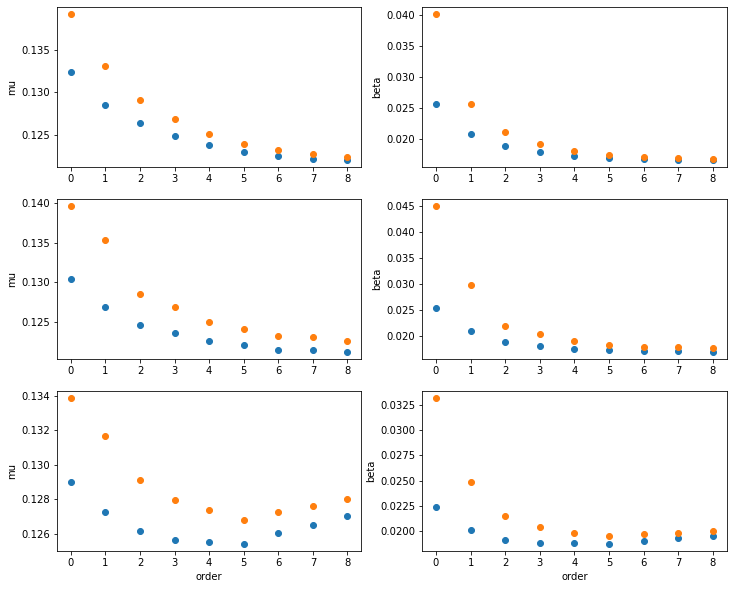

In [313]:
plot_orders(mle_params, mm_params, "test")

0, 'MLE'
0.12014028056112226 0.015414262807451881 0.4128256513026052
1, 'MLE'
0.11873747494989981 0.015502280055097295 0.4509018036072144
2, 'MLE'
0.1215430861723447 0.016783273722699138 0.36472945891783565


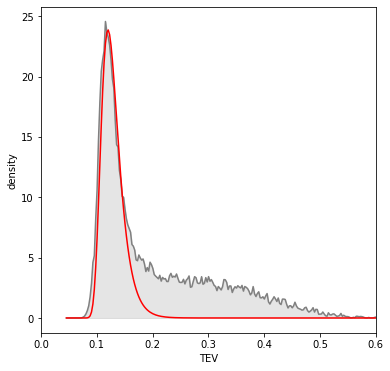

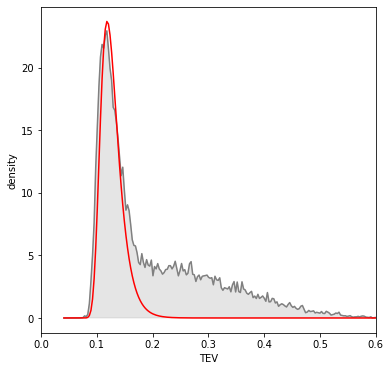

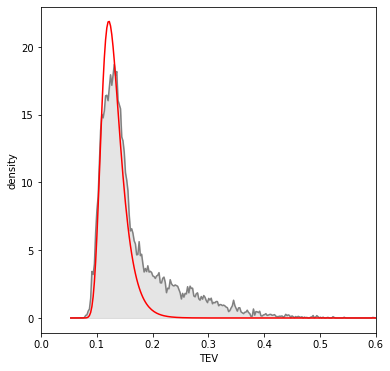

In [427]:
for order in range(3):
    top_hit = tevs[order][:,0]
    if mle_params[order][2].rvalue > 0.99:
        print(f"{order}, 'MLE'")
        best_mu, best_beta = qq_lr(top_hit, mle_params[order][2])
    else:
        print(f"{order}, 'MM'")
        best_mu, best_beta = qq_mean(top_hit, 'test', np.mean(mle_params[order][1][-3:]))
        
    best_pi = find_pi(top_hit, best_mu, best_beta)
    print(best_mu, best_beta, best_pi)
        

In [426]:
def find_pi(data, mu, beta, plot=True):
    axes, kde = FFTKDE(bw="ISJ", kernel='gaussian').fit(data).evaluate(2**8)
    trunk = len(axes[axes < 0.15])
    axes_t = axes[:trunk]
    kde_t = kde[:trunk]
    theory = lows.pdf_mubeta(axes, mu, beta, 0)
    theory_t = theory[:trunk]
    error = 1000
    best_pi = 0
    
    for pi in np.linspace(0, 1, 500):
        new_error = np.mean(abs(np.subtract(pi*kde_t, theory_t)))
        if new_error < error:
            best_pi = pi
            error = new_error
        
    if plot:
        
        fig, ax = plt.subplots(figsize=(6,6))
        
        ax.fill_between(axes, best_pi*kde, alpha=0.2, color='gray')
        ax.plot(axes, best_pi*kde, color='gray')
        ax.plot(axes, theory, color='red', linestyle='-')
        
        ax.set_xlim(0.0, 0.6)
        ax.set_xlabel("TEV")
        ax.set_ylabel("density")

        #plt.savefig("./graphs/fitted_PT_26_ch2_mean.png", dpi=600, bbox_inches="tight")
        
        
        

    return best_pi

In [368]:
pi = find_pi(tevs[0][:,0], 0.12014028056112226, 0.015414262807451881)

In [300]:
def scatter_params(params, outname="example"):
    
    x=3
    fig, ax = plt.subplots(figsize=(5,5))

    for i in range(len(params)):
        ax.scatter(params[i][0][x:], params[i][1][x:])
    
    ax.set_xlabel("mu")
    ax.set_ylabel("beta")
    ax.set_title("testing")
    ax.legend(['2+', '3+', '4+'])
    #fig.savefig(f'{outname}_params_scatter.png', dpi=400, bbox_inches='tight')
    

def plot_lower_hist(tev, params, alpha):
    fig, ax = plt.subplots(3,3, figsize=(10,10))
    sss =1
    for row in range(3):
        for col in range(3):
            plot_fit(ax[row%3, col], tev[alpha][:,sss], params[alpha][0][sss], params[alpha][1][sss], sss, col='blue', frac=1, bins=500)
            sss += 1
    #fig.savefig('yeast_3Da_1Da_f_lowerhits.png', dpi=400, bbox_inches='tight')
    
    
def plot_top_fit(tev, best_mu, best_beta, pi_0):
    
    idx = 0
    fig = plt.figure(figsize=(6,6))
    plot_fitted(tev[:,idx], best_mu , best_beta, idx, col='green', frac=pi_0, bins=300)
    plt.xlim(0.0, 0.6)
    plt.xlabel("TEV")
    plt.ylabel("density")

    #plt.savefig("./graphs/fitted_PT_26_ch2_mean.png", dpi=600, bbox_inches="tight")
    
    
def plot_orders(mle_params, mm_params, outname):
    no_orders = 10
    fig, ax = plt.subplots(3,2, figsize=(12,10))
  
    for row in range(3):
        for col in range(2):
            ax[row, col].scatter(np.arange(no_orders-1), mle_params[row][col][1:])
            ax[row, col].scatter(np.arange(no_orders-1), mm_params[row][col][1:])
            if col == 0:
                ax[row, col].set_ylabel("mu")
            else:
                ax[row, col].set_ylabel("beta")
            
            if row == 2:
                ax[row, col].set_xlabel("order")
                
    fig.savefig(f"./graphs/{outname}.png", dpi=400, bbox_inches="tight")

In [366]:
#input: pepxml files, output: np arrays (TEV score, charge, N)

def parse_pepxmls(paths):

    tev = deque()
    charges = deque()
    big_n  = deque()

    for path in paths:
        print(path)
        cur_file = pepxml.read(path)

        for spec in cur_file:
            if 'search_hit' in spec.keys():
                if len(spec['search_hit']) == 10:
                    tev.append(list(map(lambda x: -0.02*np.log(spec['search_hit'][x]['search_score']['expect']/1000), np.arange(10))))
                    charges.append(int(spec['assumed_charge']))
                    big_n.append(int(spec['search_hit'][0]['num_matched_peptides']))

    return tev, charges, big_n

#get only tevs of selected charge

def filter_charge(tev, charges, big_n, ch):
    t = np.array(tev)
    c = np.array(charges)
    n = np.array(big_n)
    mask = np.where((c == ch))
    return t[mask], n[mask]


#1 objective 1: estimate parameters for each hit separately, then plot the linear regression
def lower_params(arr):
    n0 = []
    a = []

    for hit in range(10):
        #if hit == 0: continue
        #print(hit)
        cur_tev = arr[:,hit].astype('float128')
        cur_tev = sorted(cur_tev)
        length = len(cur_tev)
        #cur_tev = cur_tev[int(length*0.05):int(length*0.95)]
        cur_n0, cur_a = lows.mle_new(cur_tev, hit)
        n0.append(cur_n0)
        a.append(cur_a)
    return n0, a

def plot_fitted( arr, N0, a, alpha, col='blue', frac=1, bins=500):
    sorted_arr = np.array(sorted(arr))
    l_lim = sorted_arr[0]
    u_lim = sorted_arr[-1]
    pdf = lows.pdf_mubeta(sorted_arr, N0, a, alpha)
    plt.plot(sorted_arr, frac*pdf,color=col)
    sns.distplot(sorted_arr, bins = np.linspace(0, 0.8, bins), kde=False, norm_hist=True,
                hist_kws=dict(histtype='step', linewidth=1, color='black'))
    #ax.set_xlim(l_lim, u_lim)
    plt.xlim(l_lim, u_lim)
    
    

def plot_fit(ax, arr, N0, a, alpha, col='blue', frac=1, bins=500):
    sorted_arr = np.array(sorted(arr))
    l_lim = sorted_arr[0]
    u_lim = sorted_arr[-1]
    pdf = lows.pdf_mubeta(sorted_arr, N0, a, alpha)
    ax.plot(sorted_arr, frac*pdf,color=col)
    ax.hist(sorted_arr, bins = np.linspace(0, 0.8, bins), histtype='step', density=True)
    median = np.median(sorted_arr)
    ax.vlines(x=median, ymin=0, ymax=20)
    #ax.set_xlim(l_lim, u_lim)
    ax.set_xlim(0, 0.3)

def plot_params(n0, a, outname = "", xxx=0):

    trim_n0 = list(n0)
    trim_a = list(a)
    linreg = st.linregress(trim_n0, trim_a)
    print(linreg)

    fig = plt.figure(figsize=(5,5))
    plt.scatter(trim_n0, trim_a, marker='o', color='royalblue')
    plt.plot([min(trim_n0), max(trim_n0)], 
                [min(trim_n0)*linreg.slope + linreg.intercept, 
                max(trim_n0)*linreg.slope + linreg.intercept], color='grey')
    plt.xlabel('mu')
    plt.ylabel("beta")
    plt.xlim(min(trim_n0)-0.001, max(trim_n0)+0.001)
    
    for x in range(len(trim_n0)):
        plt.annotate(x+xxx, (trim_n0[x]+0.00001, trim_a[x]+0.00003))
        
    #plt.hlines(xmin=min(trim_n0)-0.0001, xmax=max(trim_n0)+0.0001, y=0.02, linestyles='--')

    if outname != "":
        fig.savefig(f'./graphs/{outname}.png', bbox_inches='tight', dpi=400)
        

def get_params(tevs):
    n0, a = lower_params(tevs)
    trim_n0 = list(n0)[3:]
    trim_a = list(a)[3:]
    linreg = st.linregress(trim_n0, trim_a)

    return n0, a, linreg


def get_mm(tev):
    m1 = []
    m2 = []
    for i in range(10):
        cur_m1, cur_m2 = lows.mm_estimator(tev[:,i], i)
        m1.append(cur_m1)
        m2.append(cur_m2)
    return m1, m2


def qq_mean(tev, outname, opt_a):
    
    emps = sorted(tev)
    emps_df = pd.DataFrame(emps)

    emps_df[1] = emps_df.index + 1
    emps_df[2] = emps_df[1]/len(emps)

    errors = []
    qq_range = np.linspace(0.05, 0.4, 500)

    for i in qq_range:
    
        cur_a = opt_a
        theor_q = lows.gumbel_new_ppf(emps_df[2].to_numpy()[:-1], i, cur_a)
        
        diffs = theor_q - emps_df[0].to_numpy()[:-1]
        length = len(emps_df[2][emps_df[2] < 0.2])

        diffs = abs(np.sum(diffs[:length]))
        diffs = diffs/len(theor_q[:length])
        errors.append(diffs)

    opt_idx = errors.index(min(errors))
    opt_N0 = qq_range[opt_idx]
    
    return opt_N0, opt_a

# generate quantiles
def qq_lr(tev, linreg):

    emps = sorted(tev)
    emps_df = pd.DataFrame(emps)

    emps_df[1] = emps_df.index + 1
    emps_df[2] = emps_df[1]/len(emps)

    #quantile optimization
    errors = []
    qq_range = np.linspace(0.05, 0.4, 500)
    #opt_a = np.mean(mms[:,1][-3:])
    for i in qq_range:
        cur_a = i*linreg.slope + linreg.intercept
        theor_q = lows.gumbel_new_ppf(emps_df[2].to_numpy()[:-1], i, cur_a)
        
        diffs = theor_q - emps_df[0].to_numpy()[:-1]
        length = len(emps_df[2][emps_df[2] < 0.17])

        diffs = abs(np.sum(diffs[:length]))
        diffs = diffs/len(theor_q[:length])
        errors.append(diffs)

    opt_idx = errors.index(min(errors))
    opt_N0 = qq_range[opt_idx]
    opt_a = opt_N0*linreg.slope + linreg.intercept
   
    return opt_N0, opt_a


def find_pi(data, mu, beta):
    axes, kde = FFTKDE(bw="ISJ", kernel='gaussian').fit(data).evaluate(2**8)
    trunk = len(axes[axes < 0.2])
    axes = axes[:trunk]
    kde = kde[:trunk]
    theory = lows.pdf_mubeta(axes, mu, beta, 0)
    error = 1000
    best_pi = 0
    
    for pi in np.linspace(0, 1, 500):
        new_error = np.mean(abs(np.subtract(pi*kde, theory)))
        if new_error < error:
            best_pi = pi
        error = new_error

    return best_pi


LinregressResult(slope=0.6487319486184018, intercept=-0.06269209549087809, rvalue=0.961498449913215, pvalue=0.00013859536135885387, stderr=0.07569621511223529, intercept_stderr=0.009552804390374682)


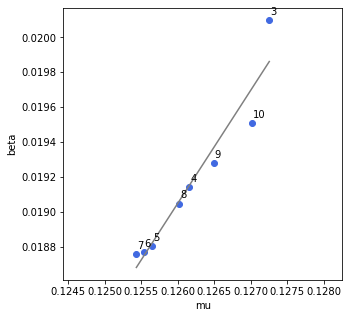

In [320]:
order = 2
nnn = 2
plot_params(mle_params[order][0][nnn:], mle_params[order][1][nnn:], 'test', nnn+1)
#plt.savefig(f"./graphs/smalltcells_ch2_scatter.png", dpi=600,bbox_inches='tight')

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.distplot(n3, bins = 50, kde=False, norm_hist=False,
                hist_kws=dict(histtype='stepfilled', linewidth=1, color='blue'))
plt.xlabel("# candidates for each spectrum")
plt.ylabel("counts")
plt.title("candidates for 3+ spectra")
plt.savefig(f"./graphs/n3.png", dpi=600,bbox_inches='tight')
#plt.xlim(0, 0.2)

In [ ]:
#plt.scatter(n022[2:], a22[2:])
fig = plt.figure(figsize=(6,6))
plt.scatter(n02[3:], a2[3:], marker="*")
plt.scatter(n03[3:], a3[3:], marker="*")
#plt.scatter(n044[3:], a44[3:], marker="*")
plt.legend(['2+', '3+', '4+'])
plt.xlabel("N0")
plt.ylabel("a")
#plt.savefig("./graphs/comparison_params.png", dpi=600, bbox_inches='tight')
#plt.scatter(n034[2:], a34[2:])

In [78]:
def plot_sam(tev, n0, a, idx, tit, bins=800):
    fig = plt.figure(figsize=(6,6))
    cur_tev = tev[:,idx]
    plot_fitted(cur_tev, n0[idx], a[idx], alpha=idx, frac=1, bins=bins)
    #plt.xlim(0, 0.4)
    plt.xlabel("TEV")
    #plt.text(x=0.15, y=15, s=f"N0: {n0[idx]:.3f}")
    #plt.text(x=0.15, y=13, s=f"a: {a[idx]:.3f}")
    plt.ylabel("density")
    plt.title(f"{tit}")
    plt.savefig(f"./graphs/covid_{idx}_tev3_testing1.png", dpi=600, bbox_inches = 'tight')

/data/dominik/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/dominik/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


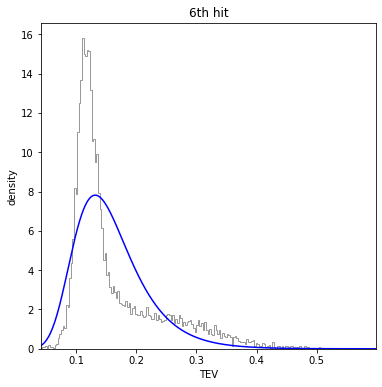

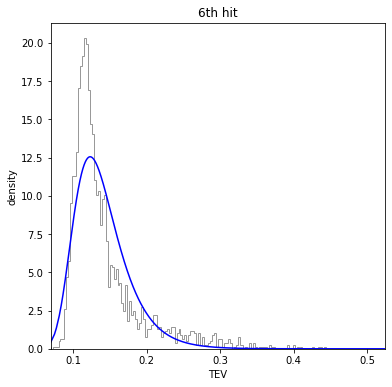

In [79]:
xxx = 0
plot_sam(tev2, n02, a2, xxx, '6th hit', bins=300)
plot_sam(tev3, n03, a3, xxx, '6th hit', bins=300)
#plot_sam(tev4, n04, a4, xxx, '6th hit', bins=300)

In [108]:
pool = pd.read_csv("./scripts/pools_pep.csv", header=None)
pool.columns = ["file", "seq"]
pool = pool[pool.file.str.contains("_26")]
peptides = set(pool['seq'])

In [120]:
df_26 = det_fdr_prophet(paths[0], peptides)

In [197]:
def BH(df):
    
    ch2_mu = 0.12364729458917836 
    ch2_beta = 0.02430852610492772
    ch3_mu = 0.11733466933867737 
    ch3_beta = 0.026235996248217347
    
    pv = np.zeros(len(df.index))
    
    k=0
    for i in df.index:
        
        cur_ch = df.at[i, 'charge']
        cur_tev = df.at[i, 'TEV']
                
        if cur_ch == 2:
            p_v = 0.47*(1 - lows.mubeta_cdf(cur_tev, ch2_mu, ch2_beta))

        if cur_ch == 3:
            p_v = 0.8*(1 - lows.mubeta_cdf(cur_tev, ch3_mu, ch3_beta))
    
        pv[k] = p_v
        k += 1
    
    df['pv'] = pv
    df = df.sort_values("pv", ascending=True)
    df.reset_index(inplace=True, drop=True)
    df.index += 1
    #BH = pd.Series((df.index.to_series() * fdr) / len(df))
    #df['bh'] = BH
    #finaldf = df[df['PP_pval'] <= df['bh']]
    return df
    

In [199]:
new_df = BH(df_26)

In [180]:
new_df

,TEV,label,scan,charge,peptide,pv
1,0.454813,1.0,21470.0,2.0,HAQTVETLLR,0.000001
2,0.446654,1.0,21451.0,2.0,HAQTVETLLR,0.000002
3,0.442111,1.0,25360.0,2.0,VDCAFLDQPR,0.000002
4,0.438813,1.0,7767.0,2.0,GYDQSAYDGK,0.000002
5,0.436398,1.0,21516.0,2.0,HAQTVETLLR,0.000003
...,...,...,...,...,...,...
54557,0.050970,0.0,53783.0,2.0,KDLPFVEEIK,1.000000
54558,0.049491,0.0,23407.0,2.0,EQEIKLQK,1.000000
54559,0.049185,0.0,29696.0,2.0,STLDELLGR,1.000000
54560,0.048768,0.0,38726.0,2.0,EEAEEALK,1.000000


In [178]:
lows.mubeta_cdf(0.45813, 0.1236, 0.0243)

0.9999989499441363

In [181]:
def get_fdr(df, fdr):
    BH = pd.Series((df.index.to_series() * fdr) / len(df))
    df['bh'] = BH
    finaldf = df[df['pv'] <= df['bh']]
    return finaldf

In [186]:
w = get_fdr(new_df, 0.3)

In [187]:
len(w[w['label'] == 0])/len(w)

0.04113876881800566

In [200]:
sup = np.linspace(0.05, 0.3, 10)
fdps = []

for i in sup:
    w = get_fdr(new_df, i)
    fdps.append(len(w[w['label'] == 0])/len(w))

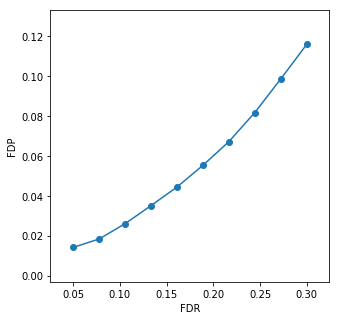

In [202]:
fig = plt.figure(figsize=(5,5))
plt.scatter(sup, fdps)
plt.plot(sup, fdps)
plt.xlabel("FDR")
plt.ylabel("FDP")
plt.savefig("./graphs/fdr_fdp_26_pi0_corrected.png", bbox_inches='tight', dpi=400)

In [127]:
def det_fdr_prophet(interactfile, ref_p):
    
    d = pepxml.read(interactfile)
    
    #pps = -1*np.ones(len(d))
    fvals = -1*np.ones(len(d))
    labels = np.zeros(len(d))
    charge = np.zeros(len(d))
    seqs = []
    specs = np.zeros(len(d))
                    
    
    k=0
    for el in d:
   
        if 'search_hit' in el.keys():
            #p_v = el['search_hit'][0]['analysis_result'][0]['peptideprophet_result']['probability']
            spec = el['start_scan']
            ch = int(el['assumed_charge'])
            pep = el['search_hit'][0]['peptide']
            fval = el['search_hit'][0]['search_score']['expect']
            fval = -0.02 * np.log(fval / 1000.)


            if pep in ref_p:
                label = 1
            else:
                label = 0
                
            fvals[k] = fval
            specs[k] = spec
            labels[k] = label
            charge[k] = ch
            seqs.append(pep)
          
            k +=1
            
    

    df = pd.DataFrame(np.array([fvals, labels, specs, charge]).T)
    df.columns = ['TEV', 'label', 'scan', 'charge']
    df = df[df['TEV'] != -1]
    df['peptide'] = seqs
    
    #df = df.sort_values('PP_pval', inplace=False, ascending=True)
    #df = df.reset_index(drop=True)
    #df.index += 1
    return df

In [1]:
def longest_common_substring(s1, s2):
    m = [[0] * (1 + len(s2)) for _ in range(1 + len(s1))]

    longest, x_longest = 0, 0

    for x in range(1, 1 + len(s1)):
        for y in range(1, 1 + len(s2)):
            if s1[x - 1] == s2[y - 1]:
                m[x][y] = m[x - 1][y - 1] + 1
                if m[x][y] > longest:
                    longest = m[x][y]
                    x_longest = x
            else:
                m[x][y] = 0

    return s1[x_longest - longest: x_longest]


In [8]:
paths = "/data/dominik/lower_order/validation/Adult_Heart_Gel_Elite_54_f10.mzXML_random.pep.xml"

In [55]:
data = parse(paths)

In [56]:
lengths = [len(el) for el in data[0].values()]
scans = [el for el in data[0].keys()]

In [62]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [57]:
c = Counter(lengths)

In [72]:
df = pd.DataFrame(data=c.values(), index=c.keys())

In [74]:
df.sort_index(axis=0)

,0
0,165
1,7594
2,6775
3,1059
4,144
5,26
6,767
7,160
8,30
9,15


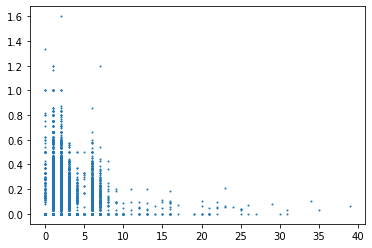

In [78]:
plt.scatter(lengths, data[2].values(),s=1)
#plt.ylim(0, 1000)

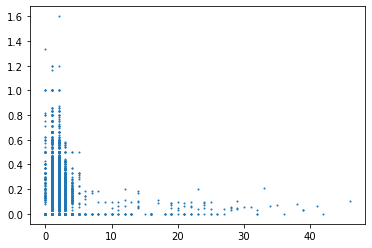

In [49]:
plt.scatter(lengths, data[2].values(),s=1)

In [54]:
def parse(path):
    
    partial = {}
    tevs = {}
    ms = {}
    

    d = pepxml.read(path)
    
    for el in d:
        if 'search_hit' in el.keys():
            scan = el['start_scan']
            if len(el['search_hit']) > 2:
                s1, tev1, m1 = get_stats(el['search_hit'][0])
                s2, tev2, m2 = get_stats(el['search_hit'][1])
                lcs = longest_common_substring(s1, s2)
                delta_tev = abs(tev1-tev2)/tev1
                delta_m = abs(m1-m2)/m1
                partial[scan] = lcs
                tevs[scan] = delta_tev
                ms[scan] = delta_m
                
    return partial, tevs, ms
            
def get_stats(hit):
    seq = hit['modified_peptide']
    tev = -0.02*np.log(hit['search_score']['expect']/1000)
    matched = hit['num_matched_ions']
    return seq, tev, matched
            

In [51]:
d = pepxml.read(paths)

In [53]:
next(d)['search_hit'][0]['modified_peptide']

'LDKSSKR'